<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-дубликатов" data-toc-modified-id="Проверка-дубликатов-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Проверка дубликатов</a></span></li><li><span><a href="#Проверка-пропусков" data-toc-modified-id="Проверка-пропусков-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка пропусков</a></span></li><li><span><a href="#Подготовка-признаков" data-toc-modified-id="Подготовка-признаков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Подготовка признаков</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Проверим-модели-при-увеличении-выборки" data-toc-modified-id="Проверим-модели-при-увеличении-выборки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Проверим модели при увеличении выборки</a></span></li><li><span><a href="#Проверим-модели-при-уменьшении-выборки" data-toc-modified-id="Проверим-модели-при-уменьшении-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Проверим модели при уменьшении выборки</a></span></li><li><span><a href="#Проверим-модели,-взвесив-классы-при-помощи-аргумента-class_weight" data-toc-modified-id="Проверим-модели,-взвесив-классы-при-помощи-аргумента-class_weight-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Проверим модели, взвесив классы при помощи аргумента class_weight</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Протестируем-модель,-показавшую-лучшую-метрику-F1." data-toc-modified-id="Протестируем-модель,-показавшую-лучшую-метрику-F1.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Протестируем модель, показавшую лучшую метрику F1.</a></span></li><li><span><a href="#Проверим-значение-метрики-AUC-ROC-лучшей-модели" data-toc-modified-id="Проверим-значение-метрики-AUC-ROC-лучшей-модели-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Проверим значение метрики AUC-ROC лучшей модели</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Отток клиентов

Из банка стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/Churn.csv')

In [3]:
df = df.drop(['Surname', 'RowNumber', 'CustomerId'], axis=1)

### Проверка дубликатов

In [4]:
df.duplicated().sum()

0

### Проверка пропусков

In [5]:
df.isna().sum()

CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [6]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df[~df['Tenure'].isna()].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000
mean,650.736553,38.949181,4.997690,76522.740015,1.530195,0.704983,0.515565,100181.214924,0.203938
std,96.410471,10.555581,2.894723,62329.528576,0.581003,0.456076,0.499785,57624.755647,0.402946
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,51227.745000,0.000000
50%,652.000000,37.000000,5.000000,97318.250000,1.000000,1.000000,1.000000,100240.200000,0.000000
75%,717.000000,44.000000,7.000000,127561.890000,2.000000,1.000000,1.000000,149567.210000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


Основные характеристики датафрема не изменились при скрывании пропусков в столбце Tenure поэтому можем от них избавиться.

In [8]:
df = df.dropna().reset_index(drop=True)

### Подготовка признаков

Разобьем датафрем на три выборки

In [9]:
!pip install fast_ml
from fast_ml.model_development import train_valid_test_split

X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df, target = 'Exited', 
                                                                            train_size=0.6, valid_size=0.2, test_size=0.2)

Преобразуем категориальные признаки при помощи техники OHE

In [10]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_valid = pd.get_dummies(X_valid, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [16]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
1367,711,34,8.0,0.00,2,0,0,48260.19,0,0,1
8544,419,27,2.0,121580.42,1,0,1,134720.51,0,1,0
112,656,39,6.0,0.00,2,1,0,141069.88,0,0,0
5013,553,44,4.0,0.00,1,1,0,10789.30,0,1,1
6933,541,46,6.0,0.00,2,1,1,83456.67,0,0,1


In [17]:
X_valid.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
4442,699,40,2.0,0.00,1,1,0,78387.32,0,1,1
1278,550,57,5.0,0.00,1,1,1,133501.94,0,0,1
1327,574,26,8.0,97460.10,1,1,1,43093.67,0,0,1
1613,697,74,3.0,108071.36,2,1,1,16445.79,1,0,0
4694,661,35,5.0,128415.45,1,1,0,142626.49,0,1,0


In [18]:
X_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
139,716,42,8.0,0.00,2,1,0,180800.42,0,1,1
4865,750,37,1.0,133199.71,2,1,1,27366.77,1,0,0
6289,660,34,1.0,0.00,2,1,0,9692.58,0,0,1
3680,850,54,4.0,120952.74,1,1,0,66963.15,0,1,0
3109,625,37,1.0,177069.24,2,1,1,96088.54,0,0,1


Потерь столбцов после кодирования не наблюдается. Масштабируем количественные признаки с разным разбросом значений

In [19]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(X_train[numeric])
X_train[numeric] = scaler.transform(X_train[numeric])

In [20]:
scaler.fit(X_valid[numeric])
X_valid[numeric] = scaler.transform(X_valid[numeric])

In [22]:
scaler.fit(X_test[numeric])
X_test[numeric] = scaler.transform(X_test[numeric])

## Исследование задачи

In [23]:
y_train.value_counts(normalize=True)

0    0.799047
1    0.200953
Name: Exited, dtype: float64

В тренировочной выборке присутствует дисбаланс классов. Исследуем несколько моделей и проверим влияние дисбаланса на качество предсказания.

**Напишем функцию поиска лучшей модели**

In [24]:
def clf_models(X_train, y_train, X_valid, y_valid):
    f1 = []
    depth_value = ['-']
    n_estimators_value = ['-', '-']
    models = []
    
    #Проверим логистическую регрессию
    model_lr = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
    model_lr.fit(X_train, y_train) 
    y_pred = model_lr.predict(X_valid) 
    result = f1_score(y_valid, y_pred)
    f1.append(result)
    models.append(model_lr)
    
    #Проверим дерево решений
    best_model_dtc = None
    best_result = 0
    best_depth = 0
    for depth in range(1, 11):
        model = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
        model.fit(X_train, y_train) 
        y_pred = model.predict(X_valid) 
        result = f1_score(y_valid, y_pred) 
        if result > best_result:
            best_model_dtc = model
            best_depth = depth
            best_result = result
    f1.append(result)
    depth_value.append(best_depth)
    models.append(best_model_dtc)
    
    #Проверим случайный лес
    best_model_rfc = None
    best_result = 0
    best_est = 0
    best_depth = 0
    for est in range(1, 101, 10):
        for depth in range (1, 11):
            model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
            model.fit(X_train, y_train) 
            y_pred = model.predict(X_valid) 
            result = f1_score(y_valid, y_pred) 
            if result > best_result:
                best_model_rfc = model
                best_result = result
                best_est = est
                best_depth = depth
    f1.append(result)
    depth_value.append(best_depth)
    n_estimators_value.append(best_est)
    models.append(best_model_rfc)
    

    df = pd.DataFrame({'clf':['Logic', 'Tree', 'Forest'], 'f1':f1, 'depth':depth_value, 
                       'n_estimators': n_estimators_value})
    print(df)

    fig, axes = plt.subplots(1, 3, figsize=(15,5))

    for model, ax in zip(models, axes.flatten()):
        plot_confusion_matrix(model, X_valid, y_valid, normalize='true', ax=ax, cmap='Blues')
        ax.title.set_text(type(model).__name__)
    plt.tight_layout()  
    plt.show()
    
    return models

      clf        f1 depth n_estimators
0   Logic  0.283525     -            -
1    Tree  0.553623     8            -
2  Forest  0.518135     4            1


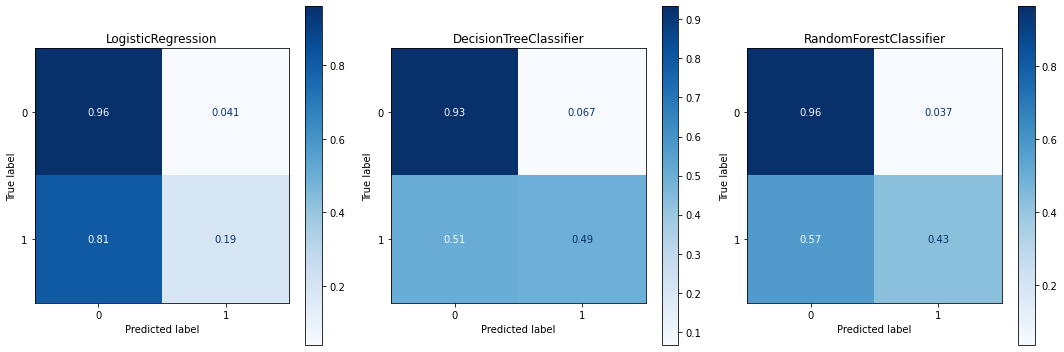

[LogisticRegression(max_iter=1000, random_state=12345),
 DecisionTreeClassifier(max_depth=8, random_state=12345),
 RandomForestClassifier(max_depth=4, n_estimators=1, random_state=12345)]

In [25]:
clf_models(X_train, y_train, X_valid, y_valid)

**Вывод:** Опираясь на результаты предсказаний, выведенные с помощью матрицы ошибок, можно сделать вывод, что из-за дисбаланса TPR в лучшем случае составляет 0.49, а F1 не привышает 0,55, что нельзя назвать удовлетворительным результатом. Проверим данные модели, исправив дисбаланс классов.

## Борьба с дисбалансом

### Проверим модели при увеличении выборки

In [26]:
#Функция увеличения выборки
def upsample(X, y, repeat):
    X_zeros = X[y == 0]
    X_ones = X[y == 1]
    y_zeros = y[y == 0]
    y_ones = y[y == 1]

    X_upsampled = pd.concat([X_zeros] + [X_ones] * repeat)
    y_upsampled = pd.concat([y_zeros] + [y_ones] * repeat)
    
    X_upsampled, y_upsampled = shuffle(X_upsampled, y_upsampled, random_state=12345)
    
    return X_upsampled, y_upsampled

In [27]:
X_train_up, y_train_up = upsample(X_train, y_train, 4)

      clf        f1 depth n_estimators
0   Logic  0.508318     -            -
1    Tree  0.531755     6            -
2  Forest  0.621787     8           51


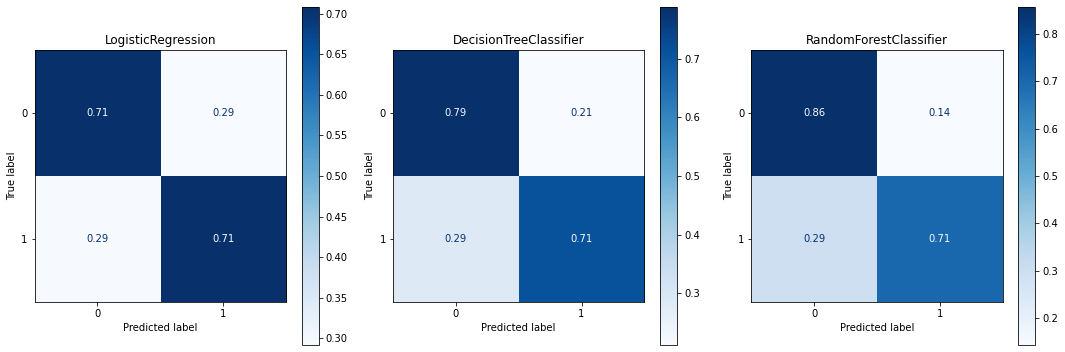

In [28]:
models_up = clf_models(X_train_up, y_train_up, X_valid, y_valid)

**Вывод:** Все модели показали значительный рост в определении 1 класса, метрика F1 превысила значение 0,6.

### Проверим модели при уменьшении выборки

In [29]:
# Функция уменьшения выборки
def downsample(X, y, fraction):
    X_zeros = X[y == 0]
    X_ones = X[y == 1]
    y_zeros = y[y == 0]
    y_ones = y[y == 1]

    X_downsampled = pd.concat([X_zeros.sample(frac=fraction, random_state=12345)] + [X_ones])
    y_downsampled = pd.concat([y_zeros.sample(frac=fraction, random_state=12345)] + [y_ones])
    
    X_downsampled, y_downsampled = shuffle(X_downsampled, y_downsampled, random_state=12345)
    
    return X_downsampled, y_downsampled

X_train_down, y_train_down = downsample(X_train, y_train, 0.2)

      clf        f1 depth n_estimators
0   Logic  0.495161     -            -
1    Tree  0.504440     6            -
2  Forest  0.572534     9           81


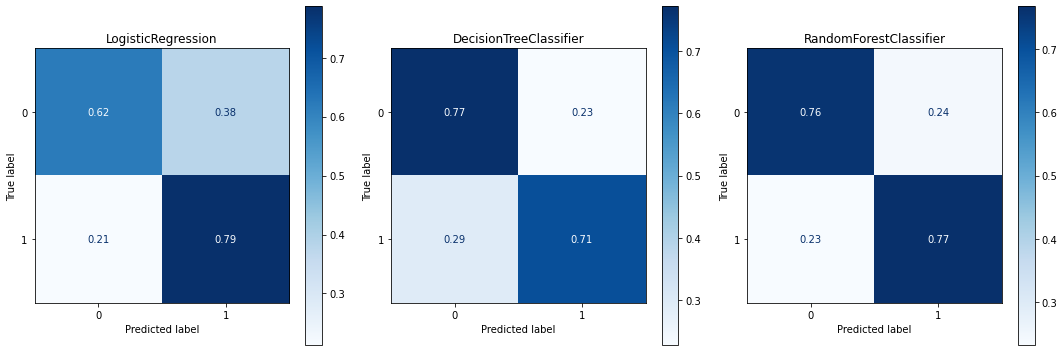

In [30]:
models_down = clf_models(X_train_down, y_train_down, X_valid, y_valid)

**Вывод:** TPR стал еще выше, однако, тоже самое нельзя сказать про F1, т.к. FP срабатываний стало больше.

### Проверим модели, взвесив классы при помощи аргумента class_weight

In [31]:
def clf_models_class_weight(X_train, y_train, X_valid, y_valid):
    f1 = []
    depth_value = ['-']
    n_estimators_value = ['-', '-']
    models = []
    
    #Проверим логистическую регрессию
    model_lr = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000, class_weight='balanced')
    model_lr.fit(X_train, y_train) 
    y_pred = model_lr.predict(X_valid) 
    result = f1_score(y_valid, y_pred)
    f1.append(result)
    models.append(model_lr)
    
    #Проверим дерево решений
    best_model_dtc = None
    best_result = 0
    best_depth = 0
    for depth in range(1, 11):
        model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced') 
        model.fit(X_train, y_train) 
        y_pred = model.predict(X_valid) 
        result = f1_score(y_valid, y_pred) 
        if result > best_result:
            best_model_dtc = model
            best_depth = depth
            best_result = result
    f1.append(result)
    depth_value.append(best_depth)
    models.append(best_model_dtc)
    
    #Проверим случайный лес
    best_model_rfc = None
    best_result = 0
    best_est = 0
    best_depth = 0
    for est in range(1, 101, 10):
        for depth in range (1, 11):
            model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced') 
            model.fit(X_train, y_train) 
            y_pred = model.predict(X_valid) 
            result = f1_score(y_valid, y_pred) 
            if result > best_result:
                best_model_rfc = model
                best_result = result
                best_est = est
                best_depth = depth
    f1.append(result)
    depth_value.append(best_depth)
    n_estimators_value.append(best_est)
    models.append(best_model_rfc)
    
    df = pd.DataFrame({'clf':['Logic', 'Tree', 'Forest'], 'f1':f1, 'depth':depth_value, 
                       'n_estimators': n_estimators_value})
    print(df)

    fig, axes = plt.subplots(1, 3, figsize=(15,5))

    for model, ax in zip(models, axes.flatten()):
        plot_confusion_matrix(model, X_valid, y_valid, normalize='true', ax=ax, cmap='Blues')
        ax.title.set_text(type(model).__name__)
    plt.tight_layout()  
    plt.show()
    
    return models

      clf        f1 depth n_estimators
0   Logic  0.506964     -            -
1    Tree  0.528587     6            -
2  Forest  0.607387     8           51


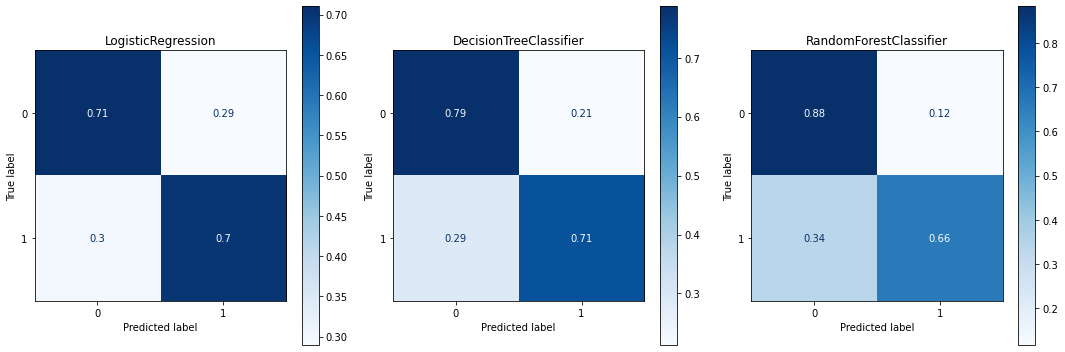

In [32]:
 models_class_weight = clf_models_class_weight(X_train, y_train, X_valid, y_valid)

**Вывод:** TPR хуже предыдущего метода борьбы с дисбалансом, хотя F1 лучше. 

**Общий вывод: наилучший результат F1 метрики показал модель RandomForestClassifier, это говорит о наименьшем количестве ложных срабатываний при наибольшем для этой модели показателе FPR.**

## Тестирование модели

### Протестируем модель, показавшую лучшую метрику F1.

In [40]:
for model in models_up: 
    print(type(model).__name__, f1_score(y_test, model.predict(X_test)))

LogisticRegression 0.5054080629301868
DecisionTreeClassifier 0.5821989528795811
RandomForestClassifier 0.6277205040091639


**Вывод:** значение F1 на тестовой выборке у модели RandomForestClassifier выше 0.59, не идеально конечно, но с этим уже можно работать.

### Проверим значение метрики AUC-ROC лучшей модели

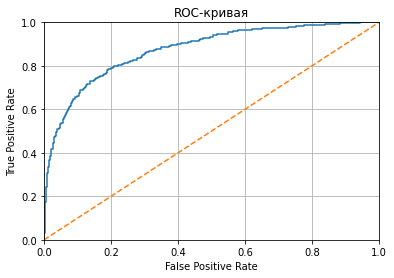

In [41]:
probabilities_test = model.predict_proba(X_test)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, probabilities_one_test)

plt.figure()

plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.title("ROC-кривая")

plt.show()

In [42]:
roc_auc_score(y_test, probabilities_one_test)

0.8736178947053005

Найдем разницу между TPR и FPR при разных порогах.

In [43]:
df_roc = pd.DataFrame({'fpr': fpr, 'tpr':tpr, 'thresholds':thresholds})

In [44]:
df_roc['tpr - fpr'] = df_roc['tpr'] - df_roc['fpr']

In [45]:
df_roc.sort_values('tpr - fpr', ascending=False).head()


,fpr,tpr,thresholds,tpr - fpr
238,0.192281,0.785326,0.465898,0.593045
200,0.139214,0.730978,0.520374,0.591764
236,0.190903,0.782609,0.466807,0.591706
234,0.188835,0.779891,0.467851,0.591056
237,0.192281,0.782609,0.465984,0.590328


**Вывод:** в зависимости от веса дохода (TPR) от удержания клиента и веса издержек (TPR) при ошибочном срабатывании можно определить оптимальный порог, при котором прибыль будет максимальной.

In [46]:
print(f"""Если веса TPR и FPR одинаковые, то в нашем случае оптимальный порог составит 
{df_roc.sort_values('tpr - fpr', ascending=False)['thresholds'].head(1)}""")

Если веса TPR и FPR одинаковые, то в нашем случае оптимальный порог составит 
238    0.465898
Name: thresholds, dtype: float64


## Общий вывод

1.Провели обучение трех моделей: LogisticRegression, DecisionTreeClassifier, RandomForestClassifier - на оригинальнйо выборке и сбалансированной. Балансировку провели тремя разными способами: с помощью аргумента class_weight, а также через увеличение и уменьшение выборки.

2.Наилучший показатель метрики F1 показала модель RandomForestClassifier(max_depth=8, n_estimators=51, random_state=12345) при увеличенной тренировочной выборки. Результат на валидационной выборке по метрике F1 0.621787, на тестовой 0.627720. Модель в 71% случаев правильно определяет клиентов, которые уйдут, и 86% случаях, которые останутся.

3.На данный момент 20% клиентов покидают банк, этот показатель можно сократить. Необходимо определить доход от удержаного клиента и издержки направленные на удержания клиента для определения оптимального порога, с помощью которого можно будет настроить модель для получения максимальной прибыли от удержания клиентов.